# Creator:
### Najeeb Zaidi
### Github: https://github.com/snajeebz
### zaidi.nh@gmail.com
### Contributors: 
1. https://github.com/snajeebz
2. https://github.com/qinajeeb
## Dataset Source: 
1. https://www.kaggle.com/competitions/titanic

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
#Disable warning
import warnings
warnings.filterwarnings("ignore")

print(f"Tensor Flow Version: {tf.__version__}")

Tensor Flow Version: 2.13.0


# Importing the Dataset

In [17]:
try:   #for Local Environment
    train_df = pd.read_csv("Dataset/train.csv")
    serving_df = pd.read_csv("Dataset/test.csv")
except: #for Kaggle Environment
    train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
    serving_df = pd.read_csv("/kaggle/input/titanic/test.csv")

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Strategy:
1. Data Preparation and Scikit Learn Algo implementation
2. Model and Hyper Parameter Tuning
3. Tensorflow Models implementation
4. Tensorflow Models and Hyper-Parameters Tuning

## 1. Data Preparation and Scikit Learn Algo implementation

### Steps:
1. Dataset EDA
2. Data Wrangling
3. Test Train Dataset preparation for scikit-Learn
4. Scikit Learn ML Model Plus Hyper Parameters Tuning
5. Submission of the Best Results.

## 1. Dataset EDA

In [18]:
print(train_df.describe());

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [19]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Observations:
1. Cabin has got 687 nulls which is more than 75% of the rows. So I guess it will be better to not use cabin as a feature for our model.
2. Age has around 20% nulls. So we will try the best to fill them up.

## Let's dig deep into Age

In [20]:
print("Group by Parch: \n",train_df['Age'].isna().groupby(train_df['Parch']).value_counts())
print("Group by Sex: \n",train_df['Age'].isna().groupby(train_df['Sex']).value_counts())
print("Group by SibSp: \n",train_df['Age'].isna().groupby(train_df['SibSp']).value_counts())
print("Group by Pclass: \n",train_df['Age'].isna().groupby(train_df['Pclass']).value_counts())



Group by Parch: 
 Parch  Age  
0      False    521
       True     157
1      False    110
       True       8
2      False     68
       True      12
3      False      5
4      False      4
5      False      5
6      False      1
Name: count, dtype: int64
Group by Sex: 
 Sex     Age  
female  False    261
        True      53
male    False    453
        True     124
Name: count, dtype: int64
Group by SibSp: 
 SibSp  Age  
0      False    471
       True     137
1      False    183
       True      26
2      False     25
       True       3
3      False     12
       True       4
4      False     18
5      False      5
8      True       7
Name: count, dtype: int64
Group by Pclass: 
 Pclass  Age  
1       False    186
        True      30
2       False    173
        True      11
3       False    355
        True     136
Name: count, dtype: int64


## Observation
1. Out the Nans of age 16% are female.
2. Out the Nans of age 21% are male.

#### Let's separate the columns to impute the nulls.

In [21]:
df = train_df[['Survived','Age','SibSp', 'Parch', 'Fare','PassengerId', 'Sex','Pclass']]
df=pd.get_dummies(df, columns=['Sex'])
df.head()


,Survived,Age,SibSp,Parch,Fare,PassengerId,Pclass,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,1,3,False,True
1,1,38.0,1,0,71.2833,2,1,True,False
2,1,26.0,0,0,7.9250,3,3,True,False
3,1,35.0,1,0,53.1000,4,1,True,False
4,0,35.0,0,0,8.0500,5,3,False,True


In [22]:
from sklearn.impute import KNNImputer
data=df[['Survived', 'SibSp', 'Parch','Fare','Sex_female', 'Sex_male','Pclass', 'Age']]
print('Before Imputations: ', data.isnull().sum())
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data=imputer.fit_transform(data)
data=pd.DataFrame(data)
print('After Imputations: ', data.isnull().sum())


Before Imputations:  Survived        0
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Pclass          0
Age           177
dtype: int64
After Imputations:  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [23]:
df['Age']=data[7]

In [24]:
df

,Survived,Age,SibSp,Parch,Fare,PassengerId,Pclass,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,1,3,False,True
1,1,38.0,1,0,71.2833,2,1,True,False
2,1,26.0,0,0,7.9250,3,3,True,False
3,1,35.0,1,0,53.1000,4,1,True,False
4,0,35.0,0,0,8.0500,5,3,False,True
...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,887,2,False,True
887,1,19.0,0,0,30.0000,888,1,True,False
888,0,26.8,1,2,23.4500,889,3,True,False
889,1,26.0,0,0,30.0000,890,1,False,True


In [25]:
figure= px.imshow(df.corr(), text_auto=True, width=1200, height=1200)
figure.show()

Upper Outliers: Series([], Name: Age, dtype: float64)
Lower Outliers: Series([], Name: Age, dtype: float64)


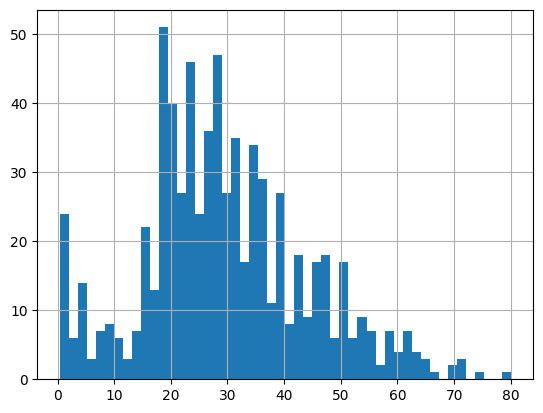

In [25]:
df['Age'].hist(bins=50)
print('Upper Outliers:',df['Age'][df['Age']>80])
print('Lower Outliers:',df['Age'][df['Age']<0])

Some noticeable correlation between Sibsp, Parch with Age. I guess if we apply Machine Learning Algorithm, we can get some fruitful model to fill the Nans of the age.

### Let's try MLP Classifier to see what we can come up with.

In [26]:
X=df[['Age', 'SibSp', 'Parch','Fare','Sex_female', 'Sex_male','Pclass']]
y=df[['Survived']]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
scaler=scale.fit(X)
X=scaler.transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=42)

In [27]:
def plotresults(results):
    results['error']=results['Predicted Age']-results['Age']

    results['percent error']=100*results['error'].abs()/results['Age']
        
    plt.figure(1)
    sns.scatterplot(data=results, x='Age', y='Predicted Age')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100,100],[-100,100])
    plt.figure(2)
    results['percent error'].hist(bins=200)
    #plt.axis('equal')
    #plt.axis('square')
 #   plt.ylim([0,1])



In [28]:
def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    print("Accuracy: ",accuracy_score(y_test,y_pred)) 
    print("Precision Score : ", precision_score(y_test,y_pred)) #precision measures the proportion of true positive predictions among all positive instances. how many of survived predicted actually survived, doesn't verifies 0's 70 survived as preicted whereas actually 92 survived so 70/92 will be the precision.  if we predicted 70 survived, so presion will tell how many of those 70 predicted survived matches the actual row by row data. It checkes all positives and verifies if the answer is true for each row?
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    print("F1 Score: ",f1_score(y_test,y_pred)) #mean of recall and precision
    cm = confusion_matrix(y_test, y_pred)
    figure= px.imshow(cm,text_auto=True, width=1200, height=1200)
    figure.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
evaluate(y_test,y_pred)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_jobs=-1,verbose=1) 
print ('Training the model')
rf.fit(X_train,y_train)
dump(rf, 'rf_model.joblib')
y_pred=rf.predict(X_test)
evaluate(y_test,y_pred)

Training the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.7932960893854749
Precision Score :  0.7534246575342466
Recall Score:  0.7859073359073359
F1 Score:  0.7482993197278911


In [40]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', 
              max_iter =1000, 
              alpha=10, 
              hidden_layer_sizes=10, 
              random_state=5,
              activation='identity',
              batch_size=360, 
              learning_rate='adaptive', 
              verbose=1,
              early_stopping=0, 
              n_iter_no_change=100)

print ('Training the model')
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
y_pred=clf.predict(X_test)
evaluate(y_test,y_pred)

Training the model
Iteration 1, loss = 0.93696334
Iteration 2, loss = 0.92557153
Iteration 3, loss = 0.91435346
Iteration 4, loss = 0.90362917
Iteration 5, loss = 0.89284527
Iteration 6, loss = 0.88269798
Iteration 7, loss = 0.87274210
Iteration 8, loss = 0.86303001
Iteration 9, loss = 0.85361562
Iteration 10, loss = 0.84432296
Iteration 11, loss = 0.83573822
Iteration 12, loss = 0.82718414
Iteration 13, loss = 0.81906253
Iteration 14, loss = 0.81118337
Iteration 15, loss = 0.80308140
Iteration 16, loss = 0.79568259
Iteration 17, loss = 0.78842508
Iteration 18, loss = 0.78159392
Iteration 19, loss = 0.77471180
Iteration 20, loss = 0.76811097
Iteration 21, loss = 0.76186287
Iteration 22, loss = 0.75565219
Iteration 23, loss = 0.74958154
Iteration 24, loss = 0.74397412
Iteration 25, loss = 0.73826743
Iteration 26, loss = 0.73292995
Iteration 27, loss = 0.72754601
Iteration 28, loss = 0.72230360
Iteration 29, loss = 0.71753317
Iteration 30, loss = 0.71269174
Iteration 31, loss = 0.7080001

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import 
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
X=df[['Age', 'SibSp', 'Parch','Fare','Sex_female', 'Sex_male','Pclass']]
scale=preprocessing.StandardScaler()
scaler=scale.fit(X)
X=scaler.transform(X)
y=df[['Survived']]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.get_params())
y_pred=model.predict(X_test)
print("Normal Model:",model.score(X_test,y_test))


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Normal Model: 0.2184467449871348


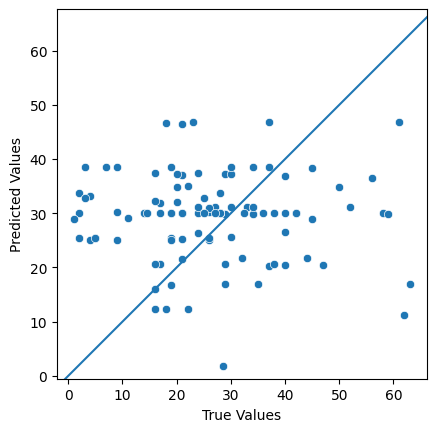

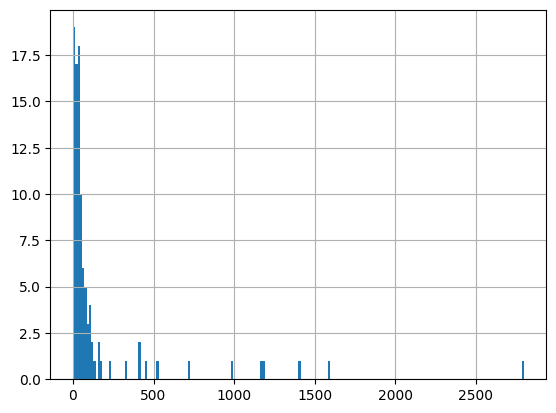

In [29]:
#results=X_test
results=pd.DataFrame(X_test)
results['Age']=y_test
results['Predicted Age']=y_pred
mae = mean_absolute_error(y_test,y_pred)
plotresults(results)

## Observations:
- Around 20% accurate predictions with MAE around 25%.
- Apart of rows, where Parch=3 and SibSp=3 the Mean Absolute Error is less than 10%. in df_nan this equates to less than 5 out of 177 values.
- It will be better to tryout CNN on this as well. Probably we can get better accuracy than this. 

In [30]:
X_train.shape[1]

7

In [31]:
model_nn=tf.keras.Sequential([
  tf.keras.layers.Dense(1281,input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='linear'),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
])
model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001) , loss='mse', metrics=['mae','mse','accuracy'])

model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1281)              10248     
                                                                 
 dense_1 (Dense)             (None, 512)               656384    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 736457 (2.81 MB)
Trainable params: 736457 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Writing function to evaluate the DL Model

In [32]:
def plot_history(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    hist1=[]
#hist1=hist.tail(550)
    hist1=hist
#sns.lineplot(data=histsamp, y='val_mse', x='epoch')

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist1['epoch'],hist1['mae'], label='Train Error')
    plt.plot(hist1['epoch'], hist1['val_mae'], label='Val_Error')
    plt.legend()
#plt.ylim([0, 0.2])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist1['epoch'],hist1['mse'], label='Train Error')
    plt.plot(hist1['epoch'], hist1['val_mse'], label='Val_Error')
    plt.legend()

9/9 [==============================] - 0s 5ms/step - loss: 215.1877 - mae: 11.4686 - mse: 215.1877 - accuracy: 0.0035
Test accuracy: [215.1876678466797, 11.468551635742188, 215.1876678466797, 0.003496503457427025]


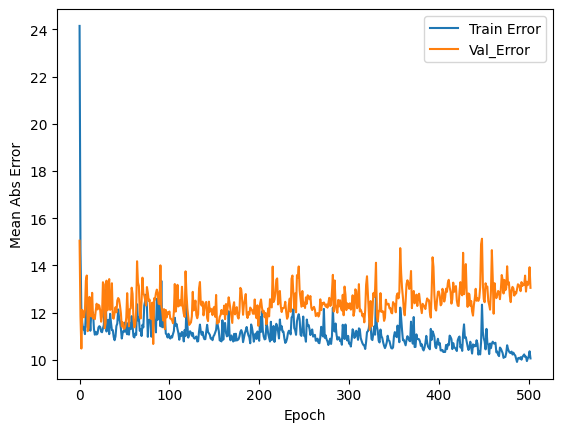

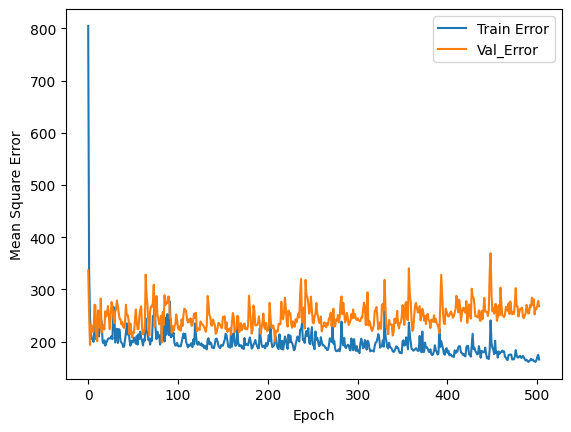

In [33]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_mae',
                                            min_delta=0,
                                            patience=500,
                                             verbose=0, mode='auto')
X_train = pd.DataFrame(X_train).astype('float32')
X_test = pd.DataFrame(X_test).astype('float32')
history=model_nn.fit(X_test,y_train, epochs=5000, verbose=0, use_multiprocessing=True, validation_split=0.1, batch_size=32,callbacks=[early_stop])
#evaluate the model
print('Test accuracy:', model_nn.evaluate(X_test,y_test))
plot_history(history)


In [34]:

print('Test accuracy:', model_nn.evaluate(X_test,y_test))
y_pred1=model_nn.predict(X_test)



9/9 [==============================] - 0s 5ms/step - loss: 215.1877 - mae: 11.4686 - mse: 215.1877 - accuracy: 0.0035
Test accuracy: [215.1876678466797, 11.468551635742188, 215.1876678466797, 0.003496503457427025]
9/9 [==============================] - 0s 3ms/step


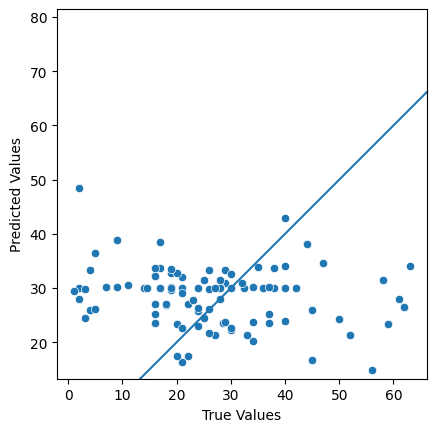

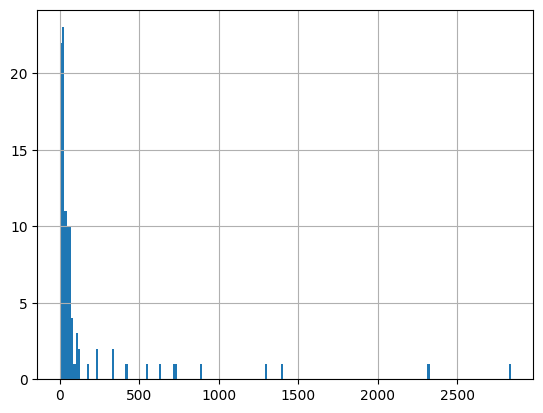

In [35]:
results1=X_test
results1=results1.join(y_test)
results1['Predicted Age']=y_pred1
results1['Predicted Age'].unique()
plotresults(results1)

## Observations:
- Despite of several attempts and combinations were unable to get decent accuracy from both Machine Learning and Deep Learning models a lot can be found in commented codes.
- If we compare both, the best results we are getting from Linear Regression ML (20% accuracy with 10 mae) when we compare it with CNN we get  maximum 4% accuracy with 11 mae)
- In addition to that if we look at the linear plot of test and predicted values, CNN results show concentration around the mean, whereas ML results show well spread predictions.
- Clear case of underfitting, we cannot run this successfully until we have a larger dataset to train.
- Other options we can use to fill the missing values is by filling it with classified means.
- To me the best option available apart of deleting the 177 nans is to predict these with 20% accurate model

____________________________________________________
### Using df_nan to predict the missing values.


In [36]:
model.fit(X_test,y_test)
df_nan[['Age']]=1
df_nan = pd.DataFrame(df_nan).astype('float32')
df_nan

,Survived,Age,SibSp,Parch,Fare,PassengerId,Pclass,Sex_female,Sex_male
5,0.0,1.0,0.0,0.0,8.458300,6.0,3.0,0.0,1.0
17,1.0,1.0,0.0,0.0,13.000000,18.0,2.0,0.0,1.0
19,1.0,1.0,0.0,0.0,7.225000,20.0,3.0,1.0,0.0
26,0.0,1.0,0.0,0.0,7.225000,27.0,3.0,0.0,1.0
28,1.0,1.0,0.0,0.0,7.879200,29.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
859,0.0,1.0,0.0,0.0,7.229200,860.0,3.0,0.0,1.0
863,0.0,1.0,8.0,2.0,69.550003,864.0,3.0,1.0,0.0
868,0.0,1.0,0.0,0.0,9.500000,869.0,3.0,0.0,1.0
878,0.0,1.0,0.0,0.0,7.895800,879.0,3.0,0.0,1.0


In [37]:
X_def=df_nan[['Survived', 'SibSp', 'Parch','Fare','Sex_female', 'Sex_male','Pclass']]
X_def=np.asarray(X_def)
y_def=model.predict(X_def)
df_nan[['Age']]=y_def
df_nan.head(177)

,Survived,Age,SibSp,Parch,Fare,PassengerId,Pclass,Sex_female,Sex_male
5,0.0,3.700331,0.0,0.0,8.458300,6.0,3.0,0.0,1.0
17,1.0,4.520348,0.0,0.0,13.000000,18.0,2.0,0.0,1.0
19,1.0,2.893190,0.0,0.0,7.225000,20.0,3.0,1.0,0.0
26,0.0,4.670000,0.0,0.0,7.225000,27.0,3.0,0.0,1.0
28,1.0,2.378832,0.0,0.0,7.879200,29.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
859,0.0,4.666698,0.0,0.0,7.229200,860.0,3.0,0.0,1.0
863,0.0,-70.481224,8.0,2.0,69.550003,864.0,3.0,1.0,0.0
868,0.0,2.881304,0.0,0.0,9.500000,869.0,3.0,0.0,1.0
878,0.0,4.142590,0.0,0.0,7.895800,879.0,3.0,0.0,1.0


## Adding the predicted values from df_nan into train_df

In [40]:
df_age=df_nan[['Age']]
for i in df_age.index:
    train_df.Age[i] = format(df_age.Age[i], '.1F')

In [39]:
train_df['Age'].isnull().sum()

0

# You can refer to the [Imputating the Nans by DL](https://www.kaggle.com/code/najeebz/titanic-deep-learning) results on that notebook:
> It resulted in 80% Accurate Results.

# Using KNN Imputer to Impute the missing values and see the result.

KeyError: "['Sex_female', 'Sex_male'] not in index"